## Selection of diffraction patterns (Figure 4)

In [1]:
# Import modules
import sys, h5py
import numpy as np
%matplotlib inline

# Import modules from src directory
sys.path.append("../src")
import plotting

In [2]:
# I/O settings
plotdir = '/Users/benedikt/phd-project/documentation/manuscripts/omrv-paper/manuscript/figures/'

### 1. Loading data from file

In [3]:
filename_selection  = '../meta/selection.h5'
with h5py.File(filename_selection, 'r') as f:
    data = f['data/data'][:]
    mask = f['data/mask'][:]
c = 700
data_cropped = data[:,c-18:-c+36,c-24:-c+30]
mask_cropped = mask[:,c-18:-c+36,c-24:-c+30]

### 2. Plotting

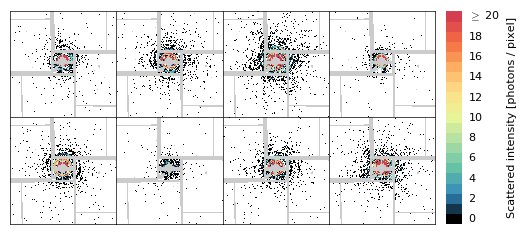

In [4]:
plot = plotting.Plot(fontsize=8, rows=2, cols=4, border_in=0.0, colorbar=True, save_pdf=True)
plot.xlabel = 8*['']
plot.ylabel = 8*['']
plot.title_label = 8*['']
plot.colorbar_label = r'Scattered intensity [photons / pixel]'
for i in range(8):
    plot.plotting_a_map(i, np.rot90(data_cropped[i],k=2), mask=np.rot90(~mask_cropped[i],k=2), 
                        log=False, vmin=1, vmax=22, discrete_colors=21, under='w', bad='0.8', cmap='discrete')
    plot.axes[i].set_xticks([])
    plot.axes[i].set_yticks([])
    plot.axes[i].set_xticklabels([])
    plot.axes[i].set_yticklabels([])
    plot.cb.ax.tick_params(length=0, width=0)
    plot.cb.set_ticks(list(np.arange(0,24,2) - 0.55))
    plot.cb.set_ticklabels(['%d' %d for d in range(0,22,2)[:-1]] + [r'$\mathbf{\geq}$ 20'])
    plot.cb.outline.set_visible(False)
    plot.axes[i].spines['top'].set_linewidth(0.5)
    plot.axes[i].spines['right'].set_linewidth(0.5)
    plot.axes[i].spines['bottom'].set_linewidth(0.5)
    plot.axes[i].spines['left'].set_linewidth(0.5)

#plot.save(plotdir + 'fig_selection.pdf')
plot.show()  

**Figure 4.**
Eight representative hits showing a variety of different diffraction patterns.                                                                                            
Masked values are shown in gray.